# Analysis of node features learned using SVD

### - SVD on adjacency matrix
### - SVD on normalized graph Laplacian matrix
### - SVD on normalized adjacency matrix

In [1]:
import numpy as np
import networkx as nx

In [2]:
# create bipartite graph with 3 nodes on one side and 4 nodes on other side of the graph
G = nx.complete_bipartite_graph(3,4)

# Following graph contains two rectangles connected by common node '3'
# G=nx.Graph()
# G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(3,5),(5,6),(6,7),(7,3),(2,4),(5,7)])

Adj = nx.adjacency_matrix(G)
print(Adj.todense())

# convert adjacency matrix to dense matrix(default format is sparse matrix)
AdjDense = Adj.todense() 

[[0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1]
 [1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0]]


## Calculate SVD of Adjacency Matrix

AdjDense is the matrix that we want to decompose using SVD as follows:

<b>SVD(AdjDense) = U \* degree_matrix(s) \* V^T</b>

In [3]:
# Calculate SVD (Singular value decomposition) of graph's adjacency matrix
u,s,v = np.linalg.svd(AdjDense)

print(u.shape)
u=np.around(u,decimals=3)
print(u)

print(s.shape)
s=np.around(s)
print(s)

print(v.shape)
v=np.around(v,decimals=3)
print(v)

(7, 7)
[[ 0.    -0.577 -0.354 -0.354 -0.354  0.408 -0.354]
 [ 0.    -0.577  0.     0.     0.    -0.816  0.   ]
 [ 0.    -0.577  0.354  0.354  0.354  0.408  0.354]
 [-0.5    0.    -0.25  -0.25  -0.25   0.     0.75 ]
 [-0.5    0.     0.75  -0.25  -0.25   0.    -0.25 ]
 [-0.5    0.    -0.25   0.75  -0.25   0.    -0.25 ]
 [-0.5    0.    -0.25  -0.25   0.75   0.    -0.25 ]]
(7,)
[ 3.  3.  0.  0.  0. -0.  0.]
(7, 7)
[[-0.577 -0.577 -0.577  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.5   -0.5   -0.5   -0.5  ]
 [ 0.     0.354 -0.354 -0.25   0.75  -0.25  -0.25 ]
 [ 0.     0.354 -0.354 -0.25  -0.25   0.75  -0.25 ]
 [ 0.     0.354 -0.354 -0.25  -0.25  -0.25   0.75 ]
 [ 0.816 -0.408 -0.408  0.     0.     0.     0.   ]
 [ 0.     0.354 -0.354  0.75  -0.25  -0.25  -0.25 ]]


In [4]:
# calculate normalized graph laplacian 
L = nx.normalized_laplacian_matrix(G).todense()

ul,sl,vl = np.linalg.svd(L)

print(ul.shape)
# u=np.around(u,decimals=5)
print(ul)

print(sl.shape)
# s=np.around(s)
print(sl)

print(vl.shape)
# v=np.around(v,decimals=5)
print(vl)

(7, 7)
[[ -4.08248290e-01  -9.06370661e-17   8.16496581e-01   0.00000000e+00
    8.93422509e-16   1.36367644e-16  -4.08248290e-01]
 [ -4.08248290e-01   8.35256312e-02  -4.08248290e-01   7.77924018e-02
    1.36037617e-01   6.84445453e-01  -4.08248290e-01]
 [ -4.08248290e-01  -8.35256312e-02  -4.08248290e-01  -7.77924018e-02
   -1.36037617e-01  -6.84445453e-01  -4.08248290e-01]
 [  3.53553391e-01  -7.60491300e-01   4.18814528e-18  -2.27926908e-01
    3.42247068e-01   5.06877823e-02  -3.53553391e-01]
 [  3.53553391e-01   4.78193756e-01   4.18814528e-18  -7.05459657e-01
   -1.45217601e-01   5.06877823e-02  -3.53553391e-01]
 [  3.53553391e-01  -1.22654848e-01   4.18814528e-18   4.30173150e-01
   -7.33083887e-01   1.11780428e-01  -3.53553391e-01]
 [  3.53553391e-01   4.04952392e-01   1.15210448e-16   5.03213416e-01
    5.36054420e-01  -2.13155993e-01  -3.53553391e-01]]
(7,)
[  2.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   1.00000000e+00   1.00000000e+00   4.26041454e-1

In [5]:
# check if rows of factor U are same as columns of factor V of graph laplacian matrix
# np.array_equal(np.around(ul,decimals=3),np.transpose(np.around(vl,decimals=3)))

# Scatter plot of node features 

### 1) Node features are extracted by applying SVD on ADJACENCY matrix of graph

Considering only first two features of each node from factor U

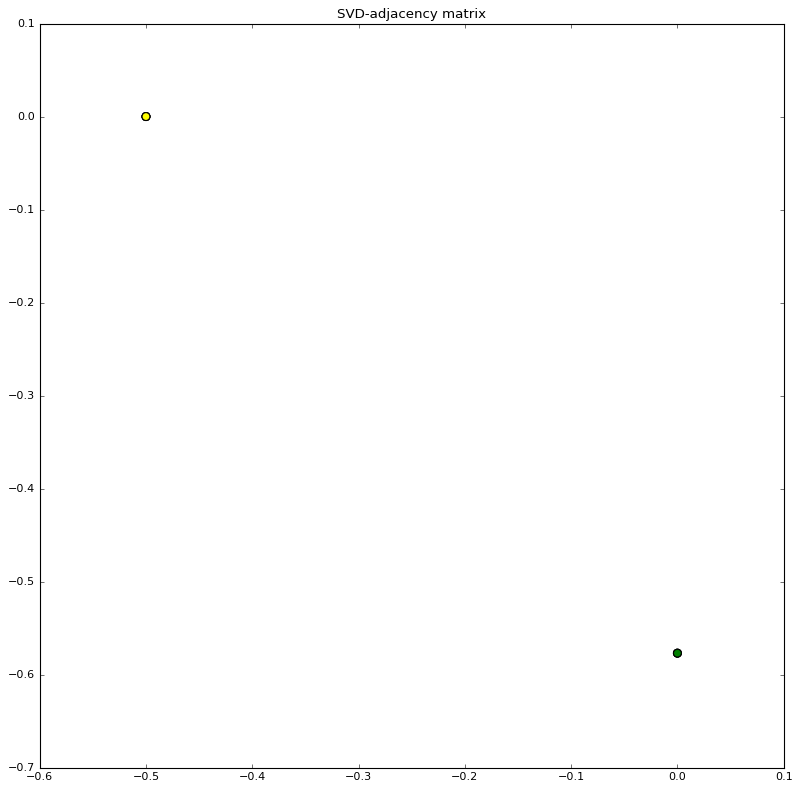

In [7]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Y=[0,0,0,1,1,1,1]

fig = plt.figure(figsize=(12,12))
colors=['green','yellow']
svd = fig.add_subplot(1,1,1)
svd.scatter(u[:,0],u[:,1],c=Y,s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("SVD-adjacency matrix")
plt.show()

## Conclusion of above scatter plot of SVD on adjacency matrix

The nodes from two groups of bipartite graphs are separable. However, the node features from a same for all the nodes in each group, hence the points on the scatter plot, representing the nodes of graph, are overlapped and we can see  only two points on the plot.


### 2) Node features are extracted by applying SVD on NORMALIZED GRAPH LAPLACIAN matrix of graph

Considering only first two features of each node from factor <b>U</b>

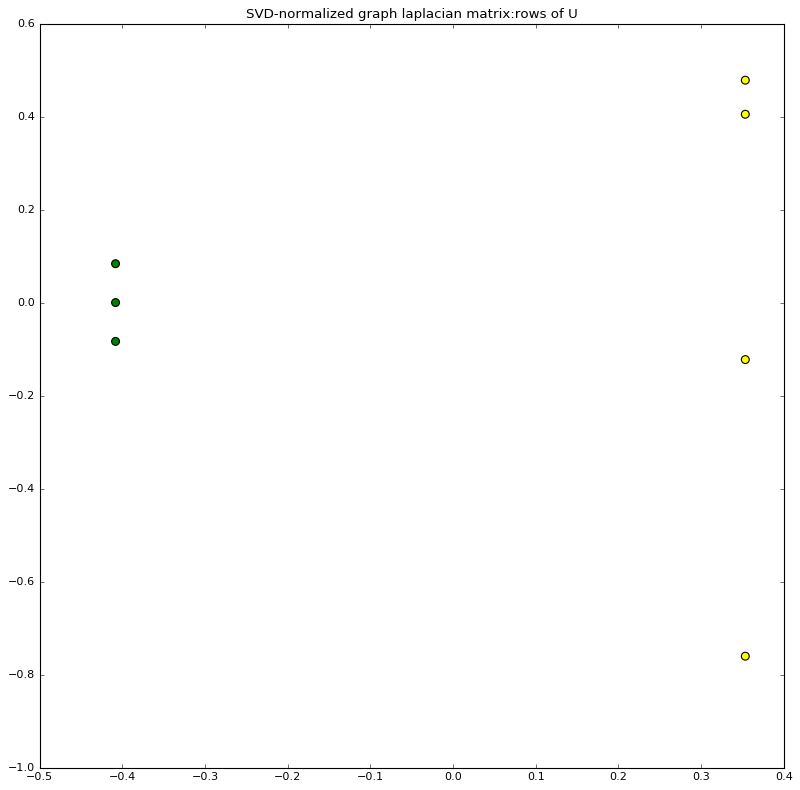

In [9]:
Y=[0,0,0,1,1,1,1]

fig = plt.figure(figsize=(12,12))
colors=['green','yellow']
svd = fig.add_subplot(1,1,1)

svd.scatter(ul[:, 0], ul[:, 1],c=Y,s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("SVD-normalized graph laplacian matrix:rows of U")
plt.show()

## Conclusion of above plot of SVD features of normalized graph Laplacian:

On the plot we can clearly see two groups of nodes. Features used here are from the first 2 components of each row of decomposed matrix U, that we get after applying SVD on normalized graph Laplacian matrix. We can conclude that SVD on normalized graph Laplacian is able to uncorrelate the relation between nodes(represented by adjacency matrix) and give nicely differentiable node vectors(represented by rows of U matrix).

### 3) Node features are extracted by applying SVD on NORMALIZED GRAPH LAPLACIAN matrix of graph

Considering only first two components of each node from factor <b>V</b>. This code was written to see if rows of U and columns of V, of SVD on normalized Laplacian matrix, represents the same features of nodes.

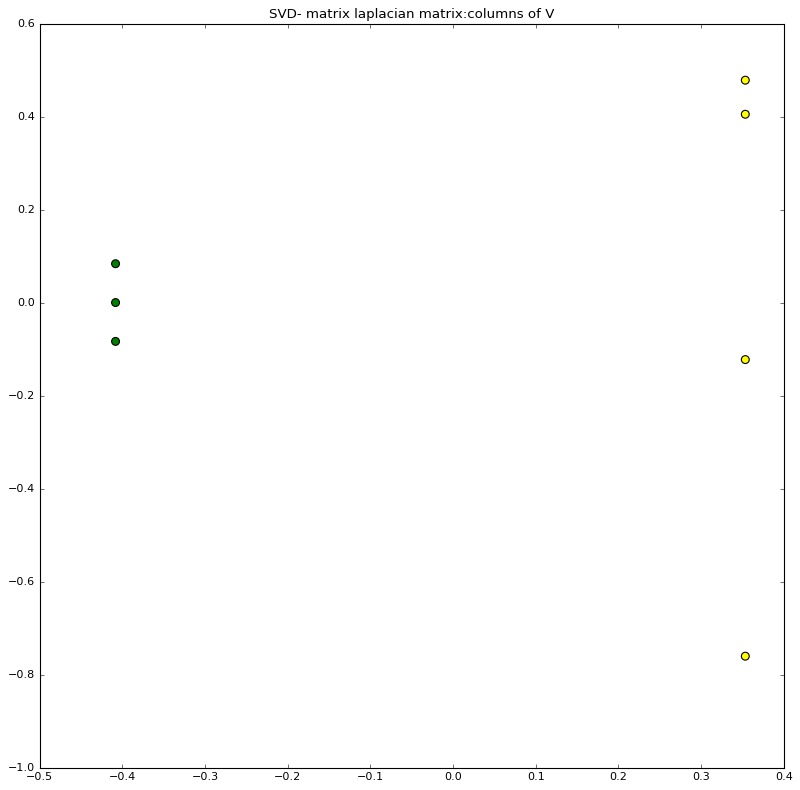

In [10]:
Y=[0,0,0,1,1,1,1]

fig = plt.figure(figsize=(12,12))
colors=['green','yellow']
svd = fig.add_subplot(1,1,1)

vt = np.transpose(vl)
svd.scatter(vt[:, 0], vt[:, 1],c=Y,s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("SVD- matrix laplacian matrix:columns of V")
plt.show()

## Conclusion on above scatter plot:

Above scatter plot shows the nodes' features extracted from matrix <b>V</b> of SVD on normalized graph Laplacian. By comparing this result with scatter plot of features from matrix <b>U</b>, we can conlcude that the features represented by the matrix U and V^T are same, when we perform SVD on <b>normalized graph Laplacian</b>.

# SVD on normalized adjacency matrix

Check if SVD on normalized adjacency matrix can generate nicely differetiable node representation

In [11]:
# calculate degree matrix
D = np.zeros((AdjDense.shape))
degree = AdjDense.sum(axis=1)
# print(degree)
for i in range(D.shape[0]):
    D[i,i]=degree[i]
print(D)

[[ 4.  0.  0.  0.  0.  0.  0.]
 [ 0.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.]]


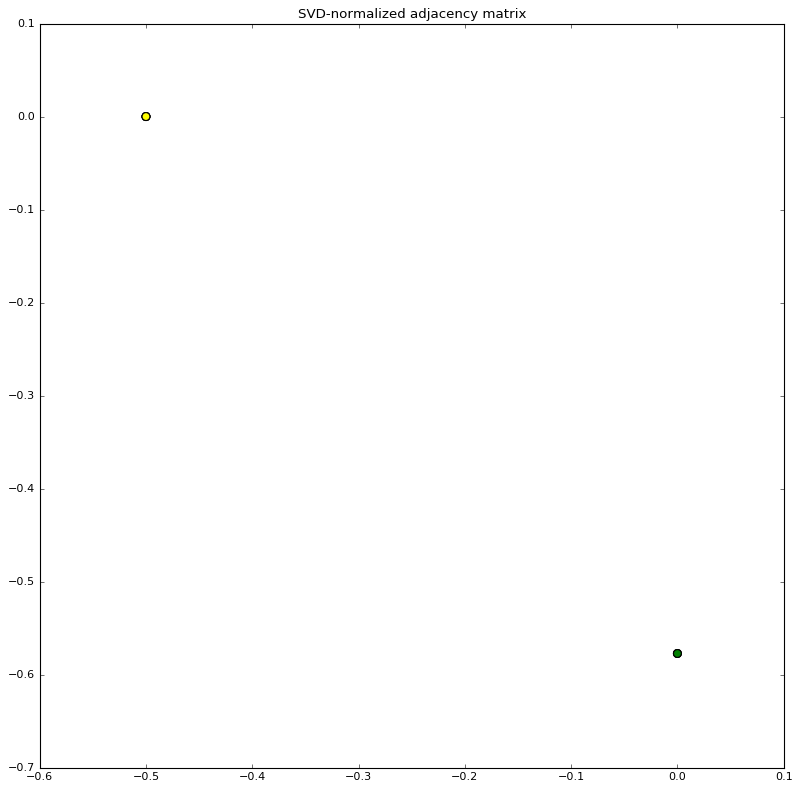

In [12]:
import scipy
# calculate D^(-1/2)
Dsq = np.linalg.inv(scipy.linalg.sqrtm(D))

# normalize the adjacency matrix
normA = Dsq*AdjDense*Dsq

# calculate SVD factors of normalized adjacency matrix
un,sn,vn = np.linalg.svd(normA)

Y=[0,0,0,1,1,1,1]

fig = plt.figure(figsize=(12,12))
colors=['green','yellow']
svd = fig.add_subplot(1,1,1)
svd.scatter(un[:, 0], un[:, 1],c=Y,s=[50,50],cmap=matplotlib.colors.ListedColormap(colors))
svd.title.set_text("SVD-normalized adjacency matrix")
plt.show()

## Conclusion on above scatter plot of SVD on normalized Adjacency matrix.

According to this [document](https://people.orie.cornell.edu/dpw/orie6334/lecture7.pdf), the normalized adjacency matrix is given as follows:

$norm\_Adj = D^{(-1/2)} * Adj * D^{(-1/2)}$

For above scatter plot, the node features are extracted from matrix U that we get after aplying SVD on normalized adjacency matrix. From the plot, it is clear that the normalization of adjacency matrix did not help in achieving any better result than simply using SVD on original adjacency matrix.